In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.integrate import quad
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import rbf_kernel
from numpy import average as avg

In [2]:
X = pd.read_csv("num_of_dates_a_year_5k.csv").to_numpy()
x = np.linspace(0, 10, 5000)

In [3]:
def gaussian(mean, var, x):
    return np.exp(-0.5 * ((x - mean) / var)**2) / (var * np.sqrt(2*math.pi))
def compute_KDE(X,x):
    ind_start = 0
    ind_current = 1
    overall_pdf = 0
    num_gaussians = 0
    complete_pdf  = 0
    for i in range(X.shape[0]):
        subset_X = X[ind_start:ind_current]
        if subset_X.size == 0:
            break
        else: 
            mu = float(subset_X)
            sigma = 0.4
            pdf = (gaussian(mu, sigma, x))
            num_gaussians += 1
            overall_pdf += pdf
            ind_start = ind_current
            ind_current += 1
    complete_pdf = overall_pdf / num_gaussians
    return complete_pdf

In [4]:
def KL_Divergence(p,q):
    sum = 0
    for i in range(len(p)):
        sum+= p[i] * math.log(p[i]/q[i])
    return sum

In [5]:
KLD_list = []
MMD_list = []
prev_KLD = float('inf')
prev_MMD = float('inf')
growing_sample = np.empty((0, X.shape[1]))
for i in range(10000):
    if i == 0:
        random_indices = np.random.choice(X.shape[0], size=20, replace=False)
        sample = X[random_indices]
    else:
        X_without_samples = np.delete(X, random_indices, axis=0)
        random_indices = np.random.choice(X.shape[0], size=20, replace=False)
        sample = X[random_indices]
    growing_sample = np.vstack((growing_sample, sample))
    # KL Divergence
    p_1_x = compute_KDE(X, x)
    p_2_x = compute_KDE(growing_sample, x)
    KLD = KL_Divergence(p_1_x, p_2_x)
    KLD_list.append(KLD)
    # MMD
    K_x = rbf_kernel(X, gamma=1)
    K_sample = rbf_kernel(growing_sample, gamma=1)
    K_x_sample = rbf_kernel(X, growing_sample, gamma=1)
    MMD = avg(K_x) + avg(K_sample) - 2*avg(K_x_sample)
    MMD_list.append(MMD)
    # Check if both KLD and MMD have stopped decreasing
    if KLD >= prev_KLD and MMD >= prev_MMD:
        approximate_subset = np.delete(growing_sample, sample)
        break
    
    prev_KLD = KLD
    prev_MMD = MMD
print(MMD_list)
print(KLD_list)


/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_48744/3221346136.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)
/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_48744/3221346136.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)
/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_48744/3221346136.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)
/var/folders/xm/v8q

[0.02172993784502597, 0.005010279157678821, 0.007186375900538389, 0.0013822595018180284, 0.004034309733420782]
[32.173947695743855, 19.38060472005692, 11.10429889543874, 9.895343932978841, 12.071407945440223]


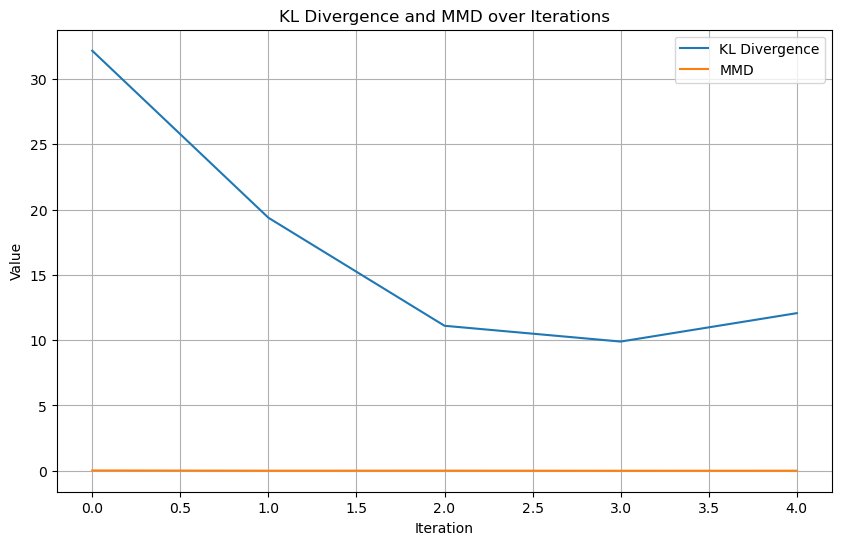

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KLD_list, label='KL Divergence')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('KL Divergence over Iterations')
plt.legend()
plt.grid(True)
plt.show()

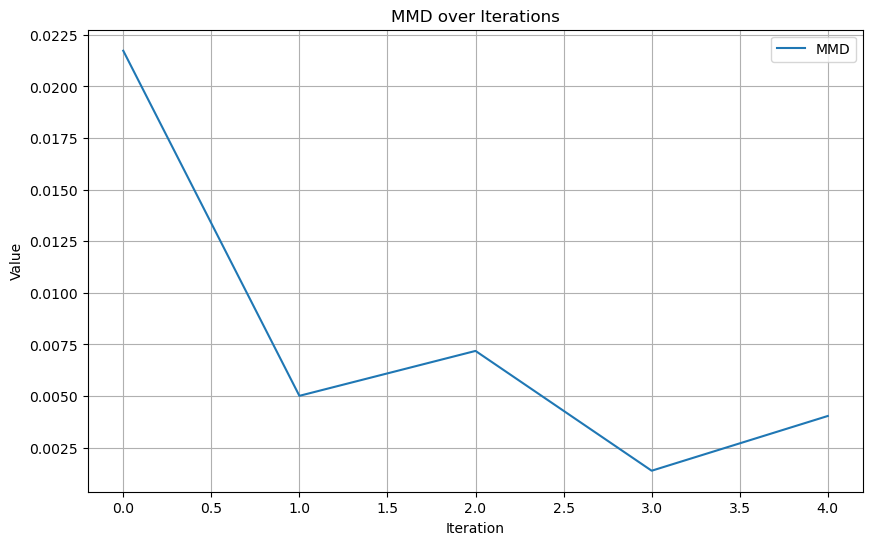

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(MMD_list, label='MMD')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('MMD over Iterations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
p_1_x = compute_KDE(X, x)
p_2_x = compute_KDE(approximate_subset, x)
KLD = KL_Divergence(p_1_x, p_2_x)
K_x = rbf_kernel(X, gamma=1)
K_sample = rbf_kernel(approximate_subset, gamma=1)
K_x_sample = rbf_kernel(X, approximate_subset, gamma=1)
MMD = avg(K_x) + avg(K_sample) - 2*avg(K_x_sample)
print(f"The KLD is {KLD}, the MMD is {MMD}")


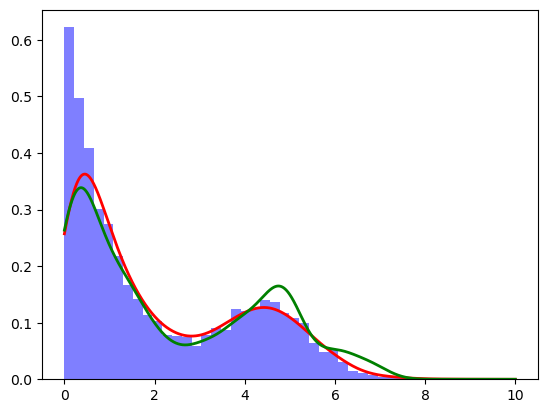

In [10]:
n, bins, patches = plt.hist(X, 40, facecolor='blue', alpha=0.5, density=True)
x = np.linspace(0, 10, 5000)
plt.plot(x, p_1_x, 'r-', linewidth = 2)
plt.plot(x, p_2_x, 'g-', label='p_2_x', linewidth=2) 
plt.show()

# The two distributions are nearly identical